Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [80]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [81]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

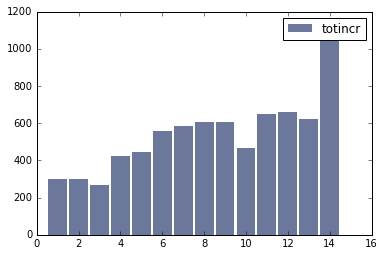

In [82]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

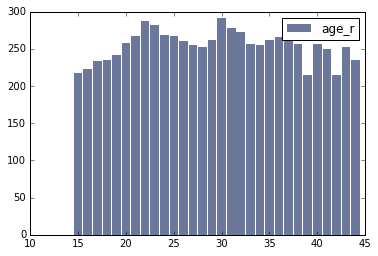

In [83]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

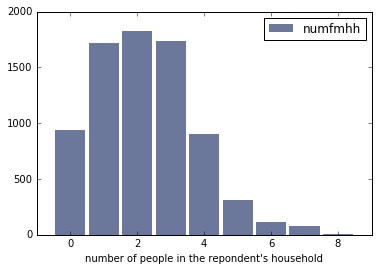

In [84]:
#start from here
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label = 'numfmhh')
thinkplot.show(xlabel = 'number of people in the repondent'+"'"+'s household')

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

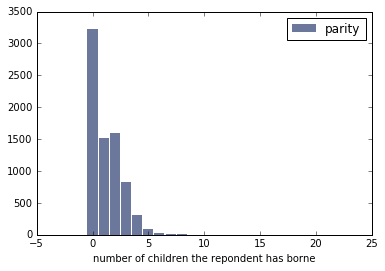

In [90]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label = 'parity')#align = 'left')
thinkplot.show(xlabel = 'number of children the repondent has borne')

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [86]:
largest = hist.Largest(1)[0]
print "The largest value of parity:      " , largest[0]
#print "No. of the largest value of parity:", largest[1]

The largest value of parity:       22


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

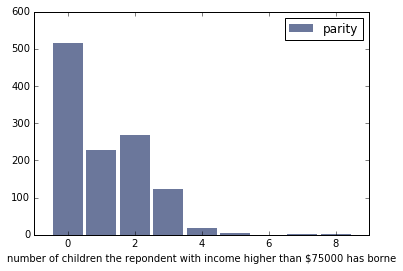

In [89]:
highincr = resp[resp.totincr == 14] #Income of $75000 or more
hist = thinkstats2.Hist(highincr.parity)
thinkplot.Hist(hist, label = 'parity')
thinkplot.show(xlabel = 'number of children the repondent with income higher than $75000 has borne')

Find the largest parities for high income respondents.

In [88]:
largest = hist.Largest(1)[0]
print "The largest value of parity for respondent with income higher than $75,000:" , largest[0]

The largest value of parity for respondent with income higher than $75,000: 8


Compare the mean <tt>parity</tt> for high income respondents and others.

In [110]:
lowincr = resp[resp.totincr <=3] #Income lower than $10000
print "The mean parity for high income respondents:                     ", highincr.parity.mean()
print "The mean parity for low income respondents:                      ", lowincr.parity.mean()
print "The mean parity for all respondents:                             ", resp.parity.mean()
print "The difference in mean parity:                                   ", abs(highincr.parity.mean()-resp.parity.mean())
print "The difference in mean parity of high and low income respondents:", abs(highincr.parity.mean()-lowincr.parity.mean())

The mean parity for high income respondents:                      1.06552305962
The mean parity for low income respondents:                       1.42840646651
The mean parity for all respondents:                              1.22321078111
The difference in mean parity:                                    0.157687721489
The difference in mean parity of high and low income respondents: 0.362883406895


Investigate any other variables that look interesting.

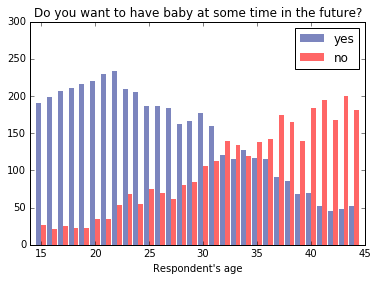

In [125]:
yes_to_babies = resp[resp.rwant == 1] #wants another baby
no_to_babies = resp[resp.rwant == 5] #do not want another baby
yes_hist = thinkstats2.Hist(yes_to_babies.age_r)
no_hist = thinkstats2.Hist(no_to_babies.age_r)

thinkplot.PrePlot(2)
thinkplot.Hist(yes_hist, align = 'right', label = 'yes', width = 0.45) #displayed on the left!!
thinkplot.Hist(no_hist, align = 'left', label = 'no', width = 0.45, color = 'r') #displayed on the right!!
thinkplot.Show(title = 'Do you want to have baby at some time in the future?', xlabel = 'Respondent' + "'" + 's age', axis = [14, 45, 0, 300])

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [152]:
import nsfg
import math

df = nsfg.ReadFemPreg()

def Cohen_d(x1, x2):
    mean_diff = x1.mean()-x2.mean()
    
    var1, var2 = x1.var(), x2.var()
    n1, n2 = len(x1), len(x2)
    s = math.sqrt((n1*var1+n2*var2)/(n1+n2))
    d = mean_diff/s
    return d

firsts = df[df.birthord == 1]
others = df[df.birthord >1]

print "The difference in mean of the total weigt of first and other babies are", Cohen_d(firsts.totalwgt_lb, others.totalwgt_lb), "std deviations"
print "The difference in mean of the pregnancy length of first and other babies are", Cohen_d(firsts.prglngth, others.prglngth), "std deviations"


The difference in mean of the total wgt of first and other babies are -0.0886729270726 std deviations
The difference in mean of the pregnancy length of first and other babies are 0.0288790446544 std deviations
